Load the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

path = r"C:\Users\Surface\Masterarbeit\data\Baseline.xlsx"

df = pd.read_excel(path)


Transformation Pipeline

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# get the numerical features
data_num = df.drop('x_Einzug [mm]', axis = 1)
# get the target values
data_labels = df['x_Einzug [mm]'].to_numpy()

# pipeline for preprocessing the data

# Standard Scaler for distribution with 0 mean and 1 std., normal distributed data
data_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

data_prep = data_pipeline.fit_transform(data_num)

X_train, X_test, y_train, y_test = train_test_split(data_prep, data_labels, test_size= 0.2, random_state=42)


3 Split Method


*   one model for training in regression predicitons
*   one model to learn the error between prediction and true value




[[ 0.          1.22474487  1.22474487  1.22474487 -1.22474487  1.22474487]
 [-1.22474487  1.22474487 -1.22474487 -1.22474487 -1.22474487 -1.22474487]
 [ 1.22474487  0.          0.          0.         -1.22474487  1.22474487]
 [ 1.22474487  0.          1.22474487  0.          1.22474487  0.        ]
 [ 0.          0.          0.          1.22474487  0.         -1.22474487]]
[8.2525 7.019  9.246  7.922  6.623 ]


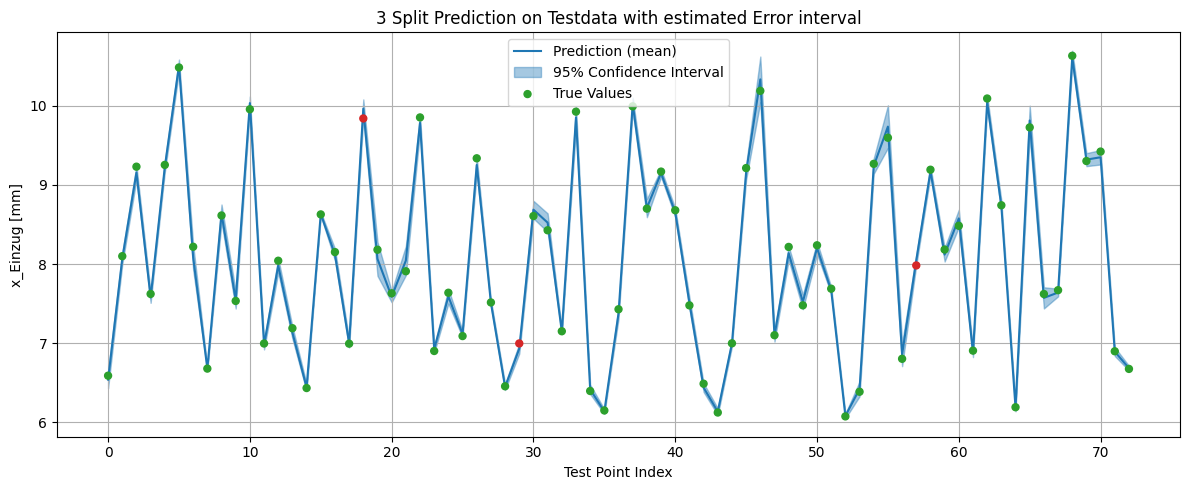

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

#split the data into 3 splits 45% / 45% / 10% according to Paper Tavazza et al.

X_temp, X_test, y_temp, y_test = train_test_split(data_prep, data_labels, test_size= 0.1, random_state=42)
X_train, X_val1, y_train, y_val1 = train_test_split(X_temp, y_temp, test_size= 0.5, random_state=42)
print(X_train[:5])
print(y_train[:5])

# One model for predicting the target value
reg_model = RandomForestRegressor(n_estimators= 100, random_state=42)
reg_model.fit(X_train, y_train)

#make predicitons and calculate the absolute error on val1
y_val1_pred = reg_model.predict(X_val1)
error_val1 = np.abs(y_val1 - y_val1_pred)

#one model to learn the error
error_model = RandomForestRegressor(n_estimators= 100, random_state=42)
error_model.fit(X_val1, error_val1)

#make predictions with both models on test data
test_pred = reg_model.predict(X_test)
test_error = error_model.predict(X_test)

lower_bound = test_pred - 2*test_error
upper_bound = test_pred + 2*test_error

# Check whether each true value lies within the 95% confidence interval
# If yes, the point will be green; if not, red
in_interval = (y_test >= lower_bound) & (y_test <= upper_bound)
colors = ['tab:green' if inside else 'tab:red' for inside in in_interval]

# Plotting the prediction with uncertainty and true values
plt.figure(figsize=(12, 5))
x_axis = np.arange(len(X_test))

# Plot predicted mean
plt.plot(x_axis, test_pred, label="Prediction (mean)", color='tab:blue')

# Shade the 95% confidence interval (±2 standard deviations)
plt.fill_between(x_axis, lower_bound, upper_bound,
                 alpha=0.4, color='tab:blue', label='95% Confidence Interval')

# Plot true target values as orange dots
plt.scatter(x_axis, y_test, label="True Values", c=colors, s=25, zorder=3)

# Add plot labels and formatting
plt.title("3 Split Prediction on Testdata with estimated Error interval")
plt.xlabel("Test Point Index")
plt.ylabel("x_Einzug [mm]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()